#Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sn
import xgboost as xgb
import sklearn as sk

from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier    # GBM algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ----- GENERAL LIBRARIES -----
import pandas as pd
import numpy as np
from numpy import array

# ---- PLOTTING -----
import matplotlib.pyplot as plt
import seaborn as sn

#Tree Explainer
!pip install shap
import shap
shap.initjs()

# ----- SKLEARN RELATED -----
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score

# ----- DEEP LEARNING -----
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

!pip install keras-metrics
import keras_metrics as km


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 2.1 MB/s 


Instructions for updating:
non-resource variables are not supported in the long term


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Dataset

In [ ]:
#Load Dataset
#Dataset source: https://archive.ics.uci.edu/ml/datasets/hepatitis
hepa_df = pd.read_csv("hepatitis.data", names=["Class","Age", "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia", "LiverB", "LiverF", "SpleenP", "Spiders", "Ascites", "Varices", "Bilirubin","AlkP","Sgot","Albumin","Protime", "Histology"])


In [ ]:
#View Dataset
hepa_df.head(5)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverB,LiverF,SpleenP,Spiders,Ascites,Varices,Bilirubin,AlkP,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [ ]:
#Class Distribution: Died (1): 32 AND Lived (2): 123
hepa_df['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [ ]:
#Convert the class from categorical to numeric
hepa_df["Class"] = [1 if val == 1 else 0 for val in hepa_df["Class"]]
hepa_df["Sex"] = [1 if val == 1 else 0 for val in hepa_df["Sex"]]
hepa_df["Steroid"] = [1 if val == 1 else 0 for val in hepa_df["Steroid"]]
hepa_df["Antivirals"] = [1 if val == 1 else 0 for val in hepa_df["Antivirals"]]
hepa_df["Fatigue"] = [1 if val == 1 else 0 for val in hepa_df["Fatigue"]]
hepa_df["Malaise"] = [1 if val == 1 else 0 for val in hepa_df["Malaise"]]
hepa_df["Anorexia"] = [1 if val == 1 else 0 for val in hepa_df["Anorexia"]]
hepa_df["LiverB"] = [1 if val == 1 else 0 for val in hepa_df["LiverB"]]
hepa_df["LiverF"] = [1 if val == 1 else 0 for val in hepa_df["LiverF"]]
hepa_df["Spiders"] = [1 if val == 1 else 0 for val in hepa_df["Spiders"]]
hepa_df["SpleenP"] = [1 if val == 1 else 0 for val in hepa_df["SpleenP"]]
hepa_df["Ascites"] = [1 if val == 1 else 0 for val in hepa_df["Ascites"]]
hepa_df["Varices"] = [1 if val == 1 else 0 for val in hepa_df["Varices"]]
hepa_df["Histology"] = [1 if val == 1 else 0 for val in hepa_df["Histology"]]

hepa_df.head(5)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverB,LiverF,SpleenP,Spiders,Ascites,Varices,Bilirubin,AlkP,Sgot,Albumin,Protime,Histology
0,0,30,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85,18,4.0,0,1
1,0,50,1,1,0,1,0,0,1,0,0,0,0,0,0.9,135,42,3.5,0,1
2,0,78,1,0,0,1,0,0,0,0,0,0,0,0,0.7,96,32,4.0,0,1
3,0,31,1,0,1,0,0,0,0,0,0,0,0,0,0.7,46,52,4.0,80,1
4,0,34,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0,200,4.0,0,1


In [ ]:
hepa_df = hepa_df.fillna(0)
hepa_df.columns

Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'LiverB', 'LiverF', 'SpleenP', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'AlkP', 'Sgot', 'Albumin', 'Protime',
       'Histology'],
      dtype='object')

In [ ]:
#Working with 20 features and 150 rows
print("The shape of the dataset: "+ str(hepa_df.shape))

The shape of the dataset: (155, 20)


#Modeling

In [ ]:
y = hepa_df["Class"] #Target variable or dependent variable (Dead = 1, Lived = 2)

X = hepa_df.drop(['Class'], axis=1) #All variables goes here.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X.tail(5)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverB,LiverF,SpleenP,Spiders,Ascites,Varices,Bilirubin,AlkP,Sgot,Albumin,Protime,Histology
150,46,1,0,0,1,1,1,0,0,0,1,1,1,7.6,0,242,3.3,50,0
151,44,1,0,0,1,0,0,0,1,0,0,0,0,0.9,126,142,4.3,0,0
152,61,1,1,0,1,1,0,1,1,0,1,0,0,0.8,75,20,4.1,0,0
153,53,0,1,0,1,0,0,0,0,1,1,0,1,1.5,81,19,4.1,48,0
154,43,1,0,0,1,0,0,0,0,1,1,1,0,1.2,100,19,3.1,42,0


In [ ]:
X.isnull().sum()

Age           0
Sex           0
Steroid       0
Antivirals    0
Fatigue       0
Malaise       0
Anorexia      0
LiverB        0
LiverF        0
SpleenP       0
Spiders       0
Ascites       0
Varices       0
Bilirubin     0
AlkP          0
Sgot          0
Albumin       0
Protime       0
Histology     0
dtype: int64

In [ ]:
X.shape

(155, 19)

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212)

In [ ]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.897


Here, I have used the DecisionTree as the base_estimator
Accuracy [AdaBoost with DT]: 61.702127659574465 %
Recall [AdaBoost with DT]: 22.22222222222222 %
precision [AdaBoost with DT]: 15.384615384615385 %
F1 score [AdaBoost with DT]: 18.181818181818183 %


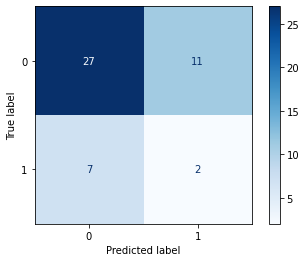

In [ ]:
### Decision Trees
dt_model = DecisionTreeClassifier()
dt_clf = dt_model.fit(X_train, y_train)

# Predict targets on the testing data
test_predictions = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, test_predictions)
dt_recall = recall_score(y_test, test_predictions)
dt_precision = precision_score(y_test, test_predictions)
dt_f1score = f1_score(y_test, test_predictions)
print("=========================================================================")
print("Here, I have used the DecisionTree as the base_estimator")
print("=========================================================================")
print("Accuracy [AdaBoost with DT]: " + str(dt_acc * 100) + " %")
print("Recall [AdaBoost with DT]: " + str(dt_recall * 100) + " %")
print("precision [AdaBoost with DT]: " + str(dt_precision * 100) + " %")
print("F1 score [AdaBoost with DT]: " + str(dt_f1score * 100) + " %")

# Compute Confusion Matrix for the Decision Tree
plot_confusion_matrix(dt_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Here, I have used the DecisionTree (Ada-boost) as the base_estimator
Accuracy [AdaBoost with DT]: 80.85106382978722 %
Recall [AdaBoost with DT]: 66.66666666666666 %
precision [AdaBoost with DT]: 50.0 %
F1 score [AdaBoost with DT]: 57.14285714285715 %


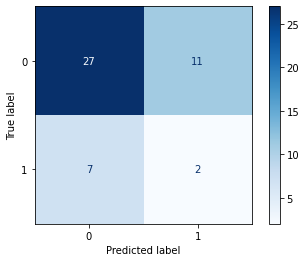

In [ ]:
### Implement Adaboost - Decision Trees
adt_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth=5),
                           n_estimators=500,
                           learning_rate=2.0,
                           algorithm='SAMME',
                           random_state=90,
                          )
adt_clf = adt_model.fit(X_train, y_train)

# Predict targets on the testing data
test_predictions = adt_clf.predict(X_test)
adt_acc = accuracy_score(y_test, test_predictions)
adt_recall = recall_score(y_test, test_predictions)
adt_precision = precision_score(y_test, test_predictions)
adt_f1score = f1_score(y_test, test_predictions)
print("=========================================================================")
print("Here, I have used the DecisionTree (Ada-boost) as the base_estimator")
print("=========================================================================")
print("Accuracy [AdaBoost with DT]: " + str(adt_acc * 100) + " %")
print("Recall [AdaBoost with DT]: " + str(adt_recall * 100) + " %")
print("precision [AdaBoost with DT]: " + str(adt_precision * 100) + " %")
print("F1 score [AdaBoost with DT]: " + str(adt_f1score * 100) + " %")

# Compute Confusion Matrix for the Decision Tree
plot_confusion_matrix(dt_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Here, I have used the RandomForestClassifier as the base_estimator
Accuracy [AdaBoost with RandomForest]: 80.85106382978722 %
Recall [AdaBoost with RandomForest]: 33.33333333333333 %
precision [AdaBoost with RandomForest]: 50.0 %
F1 score [AdaBoost with RandomForest]: 40.0 %


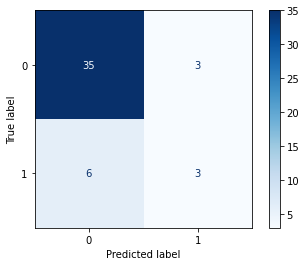

In [ ]:
### Implement Random Forest
rf_model = RandomForestClassifier(max_depth=5, random_state=0)

rf_clf = rf_model.fit(X_train, y_train)

# Predict targets on the testing data
test_predictions = rf_clf.predict(X_test)
acc = accuracy_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
f1score = f1_score(y_test, test_predictions)

print("=========================================================================")
print("Here, I have used the RandomForestClassifier as the base_estimator")
print("=========================================================================")
print("Accuracy [AdaBoost with RandomForest]: " + str(acc * 100) + " %")
print("Recall [AdaBoost with RandomForest]: " + str(recall * 100) + " %")
print("precision [AdaBoost with RandomForest]: " + str(precision * 100) + " %")
print("F1 score [AdaBoost with RandomForest]: " + str(f1score * 100) + " %")

# Compute Confusion Matrix for the Random Forest
plot_confusion_matrix(rf_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Here, I have used the LogisticRegression as the base_estimator
Accuracy [AdaBoost with LogisticRegression]: 85.1063829787234 %
Recall [AdaBoost with LogisticRegression]: 77.77777777777779 %
precision [AdaBoost with LogisticRegression]: 58.333333333333336 %
F1 score [AdaBoost with RandomForest]: 66.66666666666666 %


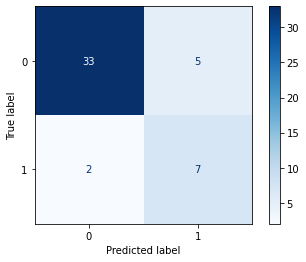

In [ ]:
### Implement LogisticRegression
lr_model = LogisticRegression(max_iter = 1500)
lr_clf = lr_model.fit(X_train, y_train)

# Predict targets on the testing data
test_predictions = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, test_predictions)
lr_recall = recall_score(y_test, test_predictions)
lr_precision = precision_score(y_test, test_predictions)
lr_f1score = f1_score(y_test, test_predictions)
print("=========================================================================")
print("Here, I have used the LogisticRegression as the base_estimator")
print("=========================================================================")
print("Accuracy [AdaBoost with LogisticRegression]: " + str(lr_acc * 100) + " %")
print("Recall [AdaBoost with LogisticRegression]: " + str(lr_recall * 100) + " %")
print("precision [AdaBoost with LogisticRegression]: " + str(lr_precision * 100) + " %")
print("F1 score [AdaBoost with RandomForest]: " + str(lr_f1score * 100) + " %")
print("=========================================================================")

# Compute Confusion Matrix for the logistic regression
plot_confusion_matrix(lr_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Here, I have used the SVM as the base_estimator [All Features]
The SVM Classifier is used as a baseline model for comparison when using the all features
Accuracy [AdaBoost with SVM ][All Features]: 82.97872340425532 %
Recall [AdaBoost with SVM][All Features]: 77.77777777777779 %
precision [AdaBoost with SVM ][All Features]: 53.84615384615385 %
F1 score [AdaBoost with SVM]: 66.66666666666666 %


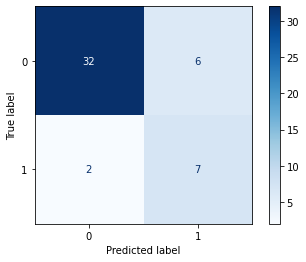

In [ ]:
# Implement Support vector
svm_model_full = svm.SVC(kernel="linear")
svm_clf_full = svm_model_full.fit(X_train, y_train)

# Predict targets on the testing data
test_predictions_full = svm_clf_full.predict(X_test)
svm_acc_full = accuracy_score(y_test, test_predictions_full)
svm_recall_full = recall_score(y_test, test_predictions_full)
svm_precision_full = precision_score(y_test, test_predictions_full)
svm_f1score = f1_score(y_test, test_predictions)
print("=========================================================================")
print("Here, I have used the SVM as the base_estimator [All Features]")
print("The SVM Classifier is used as a baseline model for comparison when using the all features")
print("=========================================================================")
print("Accuracy [AdaBoost with SVM ][All Features]: " + str(svm_acc_full * 100) + " %")
print("Recall [AdaBoost with SVM][All Features]: " + str(svm_recall_full * 100) + " %")
print("precision [AdaBoost with SVM ][All Features]: " + str(svm_precision_full * 100) + " %")
print("F1 score [AdaBoost with SVM]: " + str(svm_f1score * 100) + " %")
print("=========================================================================")

# Compute Confusion Matrix for the logistic regression
plot_confusion_matrix(svm_clf_full, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Here, I have used the XGBoost 
Accuracy [ with XGBoost ][All Features]: 80.85106382978722 %
Recall [ with XGBoost][All Features]: 27.27272727272727 %
precision [with XGBoost ][All Features]: 75.0 %
F1 score [ with XGBoost]: 17.391304347826086 %


TypeError: ignored

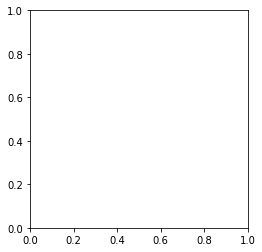

In [ ]:
# Implement XGBoost
xgb_model_full = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42)
xgb_clf_full = xgb_model_full.fit(X_train, y_train)

# Predict targets on the testing data
test_predictions_full = xgb_clf_full.predict(X_test)
xgb_acc_full = accuracy_score(y_test, test_predictions_full)
xgb_recall_full = recall_score(y_test, test_predictions_full)
xgb_precision_full = precision_score(y_test, test_predictions_full)
xgb_f1score = f1_score(y_test, test_predictions)
print("=========================================================================")
print("Here, I have used the XGBoost ")
print("=========================================================================")
print("Accuracy [ with XGBoost ][All Features]: " + str(xgb_acc_full * 100) + " %")
print("Recall [ with XGBoost][All Features]: " + str(xgb_recall_full * 100) + " %")
print("precision [with XGBoost ][All Features]: " + str(xgb_precision_full * 100) + " %")
print("F1 score [ with XGBoost]: " + str(xgb_f1score * 100) + " %")
print("=========================================================================")

# Compute Confusion Matrix for the logistic regression
plot_confusion_matrix(xgb_clf_full, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

=======================ROC Curves for Boosted ML Models=================


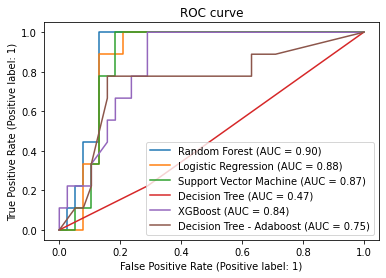

In [ ]:
print("=======================ROC Curves for Boosted ML Models=================")

fig, ax = plt.subplots()

models = [
    ("Random Forest", rf_clf),
    ("Logistic Regression", lr_clf),
    ("Support Vector Machine", svm_clf_full),
    ("Decision Tree", dt_clf),
    ("XGBoost", xgb_clf_full),
    ("Decision Tree - Adaboost", adt_clf),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = plot_roc_curve(
        pipeline, X_test, y_test, ax=ax, name=name)
_ = ax.set_title('ROC curve')
plt.show()



##Cross Validation

In [ ]:
rscores = cross_validate(RandomForestClassifier(), X, y, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'{rscores["test_accuracy"].mean()} +/- {rscores["test_accuracy"].std()}')
print(f'{rscores["test_precision"].mean()} +/- {rscores["test_precision"].std()}')
print(f'{rscores["test_recall"].mean()} +/- {rscores["test_recall"].std()}')
print(f'{rscores["test_f1"].mean()} +/- {rscores["test_f1"].std()}')

0.8258064516129032 +/- 0.02580645161290325
0.5035353535353535 +/- 0.2628184999615681
0.4809523809523809 +/- 0.29981097597518463
0.46722222222222215 +/- 0.24540467964185902


In [ ]:
lrscores = cross_validate(LogisticRegression(), X, y, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'{lrscores["test_accuracy"].mean()} +/- {lrscores["test_accuracy"].std()}')
print(f'{lrscores["test_precision"].mean()} +/- {lrscores["test_precision"].std()}')
print(f'{lrscores["test_recall"].mean()} +/- {lrscores["test_recall"].std()}')
print(f'{lrscores["test_f1"].mean()} +/- {lrscores["test_f1"].std()}')

0.8387096774193548 +/- 0.04561979233461597
0.6933333333333332 +/- 0.19020456823582807
0.5476190476190477 +/- 0.25643641938735734
0.5502444614209321 +/- 0.18178789702263032


In [ ]:
dtscores = cross_validate(DecisionTreeClassifier(), X, y, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'{dtscores["test_accuracy"].mean()} +/- {dtscores["test_accuracy"].std()}')
print(f'{dtscores["test_precision"].mean()} +/- {dtscores["test_precision"].std()}')
print(f'{dtscores["test_recall"].mean()} +/- {dtscores["test_recall"].std()}')
print(f'{dtscores["test_f1"].mean()} +/- {dtscores["test_f1"].std()}')

0.7354838709677419 +/- 0.10679319585320546
0.46805555555555556 +/- 0.2732830802946071
0.45714285714285713 +/- 0.1901187121683536
0.42187715665976533 +/- 0.15785693131605416


In [ ]:
abdtscores = cross_validate(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),X, y, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'{abdtscores["test_accuracy"].mean()} +/- {abdtscores["test_accuracy"].std()}')
print(f'{abdtscores["test_precision"].mean()} +/- {abdtscores["test_precision"].std()}')
print(f'{abdtscores["test_recall"].mean()} +/- {abdtscores["test_recall"].std()}')
print(f'{abdtscores["test_f1"].mean()} +/- {abdtscores["test_f1"].std()}')

0.7225806451612903 +/- 0.09698900889272846
0.32372960372960374 +/- 0.2034565494518356
0.42857142857142855 +/- 0.2347382389307855
0.36020202020202025 +/- 0.203683656525301


In [ ]:
svmscores = cross_validate(svm.SVC(kernel="linear"),X, y, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'{svmscores["test_accuracy"].mean()} +/- {svmscores["test_accuracy"].std()}')
print(f'{svmscores["test_precision"].mean()} +/- {svmscores["test_precision"].std()}')
print(f'{svmscores["test_recall"].mean()} +/- {svmscores["test_recall"].std()}')
print(f'{svmscores["test_f1"].mean()} +/- {svmscores["test_f1"].std()}')

0.8258064516129032 +/- 0.052413150997651356
0.6967521367521368 +/- 0.1890959919665327
0.5476190476190477 +/- 0.25643641938735734
0.5364862914862915 +/- 0.15467800899280773


In [ ]:
xgscores = cross_validate(xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42),X, y, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'{xgscores["test_accuracy"].mean()} +/- {xgscores["test_accuracy"].std()}')
print(f'{xgscores["test_precision"].mean()} +/- {xgscores["test_precision"].std()}')
print(f'{xgscores["test_recall"].mean()} +/- {xgscores["test_recall"].std()}')
print(f'{xgscores["test_f1"].mean()} +/- {xgscores["test_f1"].std()}')

0.8064516129032258 +/- 0.04080358271185008
0.6166666666666667 +/- 0.23333333333333334
0.4523809523809524 +/- 0.2621211227528168
0.4545697577276524 +/- 0.1680377678447147


## ROC AUC Curves on CV

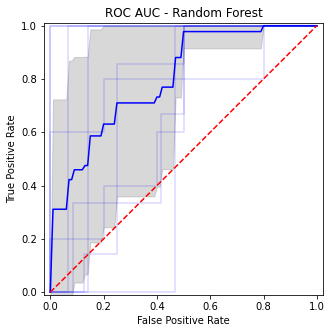

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(n_splits=10)
kf.get_n_splits(X)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train_index, test_index in kf.split(X):
    model = RandomForestClassifier().fit(X.iloc[train_index, :], y[train_index])
    y_score = model.predict_proba(X.iloc[test_index, :])
    fpr, tpr, _ = roc_curve(y[test_index], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = np.nanmean(tprs, axis=0)
std = np.nanstd(tprs, axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC AUC - Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

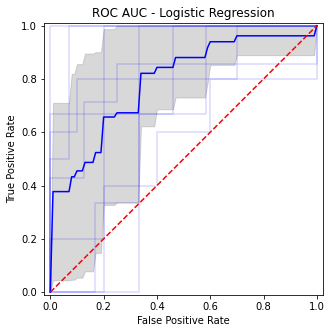

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(n_splits=10)
kf.get_n_splits(X)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train_index, test_index in kf.split(X):
    model = LogisticRegression().fit(X.iloc[train_index, :], y[train_index])
    y_score = model.predict_proba(X.iloc[test_index, :])
    fpr, tpr, _ = roc_curve(y[test_index], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = np.nanmean(tprs, axis=0)
std = np.nanstd(tprs, axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC AUC - Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

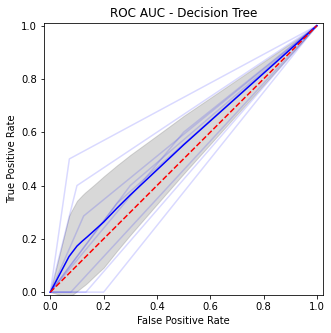

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(n_splits=10)
kf.get_n_splits(X)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train_index, test_index in kf.split(X):
    model = DecisionTreeClassifier().fit(X.iloc[train_index, :], y[train_index])
    y_score = model.predict_proba(X.iloc[test_index, :])
    fpr, tpr, _ = roc_curve(y[test_index], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = np.nanmean(tprs, axis=0)
std = np.nanstd(tprs, axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC AUC - Decision Tree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

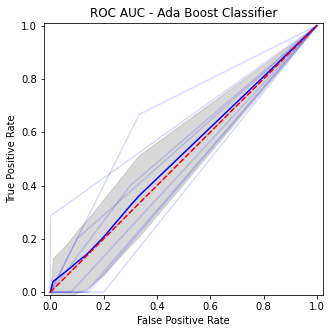

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(n_splits=10)
kf.get_n_splits(X)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train_index, test_index in kf.split(X):
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()).fit(X.iloc[train_index, :], y[train_index])
    y_score = model.predict_proba(X.iloc[test_index, :])
    fpr, tpr, _ = roc_curve(y[test_index], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = np.nanmean(tprs, axis=0)
std = np.nanstd(tprs, axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC AUC - Ada Boost Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

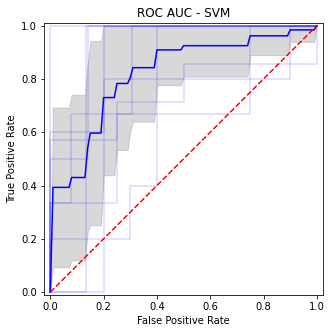

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(n_splits=10)
kf.get_n_splits(X)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train_index, test_index in kf.split(X):
    model = svm.SVC(kernel="linear", probability=True).fit(X.iloc[train_index, :], y[train_index])
    y_score = model.predict_proba(X.iloc[test_index, :])
    fpr, tpr, _ = roc_curve(y[test_index], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = np.nanmean(tprs, axis=0)
std = np.nanstd(tprs, axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC AUC - SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

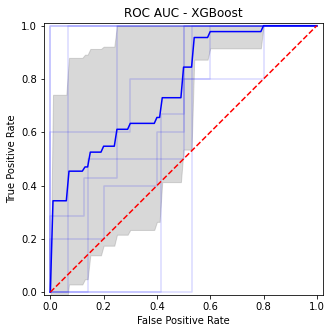

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

kf = KFold(n_splits=10)
kf.get_n_splits(X)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

for train_index, test_index in kf.split(X):
    model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42).fit(X.iloc[train_index, :], y[train_index])
    y_score = model.predict_proba(X.iloc[test_index, :])
    fpr, tpr, _ = roc_curve(y[test_index], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = np.nanmean(tprs, axis=0)
std = np.nanstd(tprs, axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC AUC - XGBoost')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Feature Importance

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature.

A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
df_fi = pd.DataFrame({'Columns': X.columns, 'Importance': model.feature_importances_})

df_fi.head()

,Columns,Importance
0,Age,0.082202
1,Sex,0.015670
2,Steroid,0.018030
3,Antivirals,0.005631
4,Fatigue,0.021190


In [ ]:
df_fi.sort_values('Importance', ascending=False)

,Columns,Importance
13,Bilirubin,0.146749
16,Albumin,0.142714
14,AlkP,0.087330
0,Age,0.082202
15,Sgot,0.076705
11,Ascites,0.072733
17,Protime,0.072165
10,Spiders,0.057096
5,Malaise,0.041489
18,Histology,0.038746


## Tree Explainer

SHAP — which stands for SHapley Additive exPlanations — is probably the state of the art in Machine Learning explainability.  

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [ ]:
model = DecisionTreeClassifier().fit(X, y)
explainer = shap.TreeExplainer(model)

In [ ]:
df_dropout = X.loc[y == 1, :]
df_dropout.head(10)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverB,LiverF,SpleenP,Spiders,Ascites,Varices,Bilirubin,AlkP,Sgot,Albumin,Protime,Histology
6,51,1,1,0,1,0,1,0,0,1,1,0,0,0.0,0,0,0.0,0,1
30,39,1,1,1,1,1,0,0,1,0,0,0,0,2.3,280,98,3.8,40,1
31,62,1,1,0,1,1,0,0,0,0,0,0,0,1.0,0,60,0.0,0,1
35,37,1,0,0,1,0,0,0,0,0,1,0,0,0.6,67,28,4.2,0,1
67,57,1,0,0,1,1,1,0,0,0,1,1,0,4.1,0,48,2.6,73,1
71,34,1,1,0,1,1,0,1,1,0,1,0,0,2.8,127,182,0.0,0,1
76,58,1,0,0,1,0,0,1,1,1,1,0,0,2.0,167,242,3.3,0,1
86,44,1,1,0,1,1,0,0,0,1,0,0,1,0.9,135,55,0.0,41,0
87,30,1,0,0,1,1,1,0,1,0,1,1,1,2.5,165,64,2.8,0,0
88,38,1,1,0,1,1,1,0,1,0,1,1,1,1.2,118,16,2.8,0,0


In [ ]:
plots = []

for index, row in df_dropout.iterrows():
    shap_value_single = explainer.shap_values(X = X.iloc[index,:])

    plots.append(shap.force_plot(base_value = explainer.expected_value[1],
                    shap_values = shap_value_single[1],
                    features = X.iloc[index,:]))


In [ ]:
shap.initjs()
plots[29]

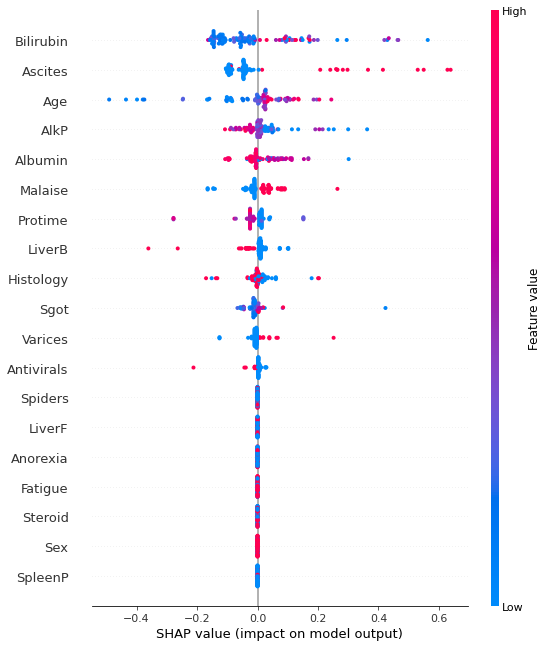

In [ ]:
# First, we need the shap values for each sample in the training set
shap_values = explainer.shap_values(X_train)
# Then, we can plot the summary_plot w.r.t the positive class
shap.summary_plot(shap_values[1], X_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_test= ss.fit_transform(X_test)
X_train = ss.fit_transform(X_train)

Training models

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predlr = lr.predict(X_test)

Scoring accuracy of different models

In [ ]:
xgmean = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =3)
print(f"XGBoost Accuracy : {xgmean.mean()}\n")

lrmean = cross_val_score(estimator=lr, X=X_train, y=y_train, cv =3)
print(f"Logistic Regresion Accuracy : {lrmean.mean()}\n")


rfmean = cross_val_score(estimator=rf, X=X_train, y=y_train, cv =3)
print(f"Random Forest Accuracy : {rfmean.mean()}\n")

dtmean = cross_val_score(estimator=dt, X=X_train, y=y_train, cv =3)
print(f"Decision Trees Accuracy : {dtmean.mean()}\n")

XGBoost Accuracy : 0.8464963221060783

Logistic Regresion Accuracy : 0.8466898954703832

Random Forest Accuracy : 0.8302361595044522

Decision Trees Accuracy : 0.8712737127371274



################################Checking##########################

In [ ]:
model_parameters = {'n_estimators': [10, 50, 100, 200, 500, 750, 1000], 'max_depth': [3, 5, 10],
                    'min_samples_leaf': [np.random.randint(1,10)], 'max_features': [None, 'sqrt', 'log2']}

In [ ]:
model = GradientBoostingClassifier(random_state = 10)
gscv_GBM = GridSearchCV(estimator = model,
                        param_grid = model_parameters,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1,
                        scoring = 'roc_auc')

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [2],
                         'n_estimators': [10, 50, 100, 200, 500, 750, 1000]},
             scoring='roc_auc', verbose=1)

In [ ]:
print('The best parameters are -', gscv_GBM.best_params_)

The best parameters are - {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 10}


In [ ]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                           n_estimators=10)

In [ ]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.92      0.96        25

    accuracy                           0.98       124
   macro avg       0.99      0.96      0.97       124
weighted avg       0.98      0.98      0.98       124

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.33      0.14      0.20         7

    accuracy                           0.74        31
   macro avg       0.56      0.53      0.52        31
weighted avg       0.68      0.74      0.70        31



###########Check with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (108, 19)
Number transactions y_train dataset:  (108,)
Number transactions X_test dataset:  (47, 19)
Number transactions y_test dataset:  (47,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 21
Before OverSampling, counts of label '0': 87 

After OverSampling, the shape of train_X: (174, 19)
After OverSampling, the shape of train_y: (174,) 

After OverSampling, counts of label '1': 87
After OverSampling, counts of label '0': 87


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [ ]:
clf.best_params_

{'C': 2.0}

In [ ]:
lr1 = LogisticRegression(C=2,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=2, verbose=5)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 80.95238095238095%


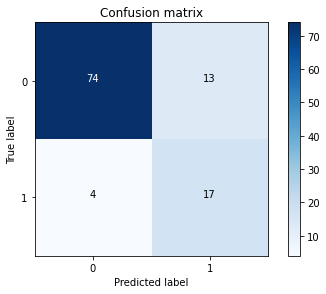

In [ ]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

############################Another SMOTE Result#############

In [ ]:
from sklearn.linear_model import LogisticRegression
#Initalize the classifier
clf = LogisticRegression(random_state=0)
#Fitting the training data
clf.fit(X_train, y_train)
#Predicting on test
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  2]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.75      0.55      0.63        11

    accuracy                           0.85        47
   macro avg       0.81      0.74      0.77        47
weighted avg       0.84      0.85      0.84        47



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_res)

array([87, 87])

In [ ]:
from sklearn.metrics import classification_report
clf1 = LogisticRegression(random_state=0)
#Fitting the training data
clf1.fit(X_res, y_res)
#Predicting on test
y_pred1=clf1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[30  6]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.60      0.82      0.69        11

    accuracy                           0.83        47
   macro avg       0.77      0.83      0.79        47
weighted avg       0.86      0.83      0.84        47



In [ ]:
crf = RandomForestClassifier(max_depth=5, random_state=0)
#Fitting the training data
crf.fit(X_res, y_res)
#Predicting on test
y_pred1=crf.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[31  5]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.62      0.73      0.67        11

    accuracy                           0.83        47
   macro avg       0.76      0.79      0.78        47
weighted avg       0.84      0.83      0.83        47



In [ ]:
cxg = xgb.XGBClassifier(random_state=90)
#Fitting the training data
cxg.fit(X_res, y_res)
#Predicting on test
y_pred1=cxg.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[27  9]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.40      0.55      0.46        11

    accuracy                           0.70        47
   macro avg       0.62      0.65      0.63        47
weighted avg       0.74      0.70      0.72        47



In [ ]:
csvm = svm.SVC(kernel="linear")
#Fitting the training data
csvm.fit(X_res, y_res)
#Predicting on test
y_pred1=csvm.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[28  8]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.53      0.82      0.64        11

    accuracy                           0.79        47
   macro avg       0.73      0.80      0.75        47
weighted avg       0.84      0.79      0.80        47



In [ ]:
cada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth=5),
                           n_estimators=500,random_state=90,)
#Fitting the training data
cada.fit(X_res, y_res)
#Predicting on test
y_pred1=cada.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[31  5]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.62      0.73      0.67        11

    accuracy                           0.83        47
   macro avg       0.76      0.79      0.78        47
weighted avg       0.84      0.83      0.83        47



In [ ]:
cadt = DecisionTreeClassifier(random_state=30)
#Fitting the training data
cadt.fit(X_res, y_res)
#Predicting on test
y_pred1=cadt.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[24 12]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        36
           1       0.33      0.55      0.41        11

    accuracy                           0.64        47
   macro avg       0.58      0.61      0.58        47
weighted avg       0.71      0.64      0.66        47

